# Chapter 4 - Clustering Models
## Segment 2 - Hierarchical methods
#### Setting up for clustering analysis

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
import sklearn.metrics as sm

In [2]:
from sklearn.cluster import AgglomerativeClustering

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [3]:
np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(10, 3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [4]:
address = '/Users/brandonking/PycharmProjects/python_for_data_science_2/Data/mtcars.csv'

cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

X = cars[['mpg', 'disp', 'hp', 'wt']].values
# Predicting 'am' variable (automatic or transmission
y = cars.iloc[:,(9)].values

### Using scipy to generate dendrogram

In [5]:
Z = linkage(X, 'ward')

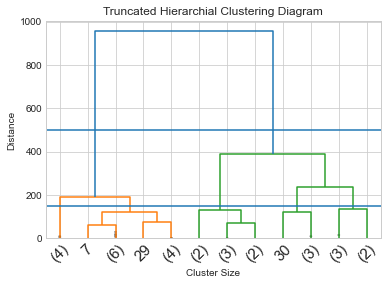

In [6]:
# Setting up Dendrogram
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15, show_contracted=True)
# Plotting Dendrogram
plt.title('Truncated Hierarchial Clustering Diagram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=500)
plt.axhline(y=150)
plt.show()

## Generating hierarchical clusters

In [10]:
k=2

Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
Hclustering.fit(X)

print(f'AgglomerativeClustering with affinity=euclidean and linkage=ward: {sm.accuracy_score(y, Hclustering.labels_)}')

AgglomerativeClustering with affinity=euclidean and linkage=ward: 0.78125


In [8]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
Hclustering.fit(X)

print(f'AgglomerativeClustering with affinity=euclidean and linkage=average: {sm.accuracy_score(y, Hclustering.labels_)}')

0.78125

In [9]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='manhattan', linkage='average')
Hclustering.fit(X)

print(f'AgglomerativeClustering with affinity=manhattan and linkage=average: {sm.accuracy_score(y, Hclustering.labels_)}')

0.71875